# ¡Hola, Laura!  

Mi nombre es Carlos Ortiz, soy code reviewer de TripleTen y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>
¡Empecemos!

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import factorial
from scipy import stats as st


## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
df_calls = pd.read_csv ('/datasets/megaline_calls.csv')
df_internet = pd.read_csv ('/datasets/megaline_internet.csv')
df_messages = pd.read_csv ('/datasets/megaline_messages.csv')
df_plans = pd.read_csv ('/datasets/megaline_plans.csv')
df_users = pd.read_csv ('/datasets/megaline_users.csv')

<div class="alert alert-block alert-info">
<b> Una disculpa, ya lo corregí. </b> <a class="tocSkip"></a>
</div>

## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
display(df_plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


En este dataframe no se observa ningún problema con los datos

## Corregir datos


Cambiaré el nombre de la columna plan_name por plan y transformaré los mb_per_month_includes por gb


In [5]:
#Vamos a transformar los mb a gb
df_plans['mb_per_month_included'] = df_plans['mb_per_month_included']/1024
df_plans['mb_per_month_included'] = np.ceil(df_plans['mb_per_month_included'])
#voy a cambiar el nombre de la columna plan_name por plan, para que coincida con el dataframe de usuarios y la columna mb_per_month... a gb_per....
df_plans.rename(columns = {'plan_name':'plan', 'mb_per_month_included': 'gb_per_month_included'}, inplace = True) 
display(df_plans)

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


## Enriquecer los datos

## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Imprime una muestra de datos para usuarios
display(df_users[df_users['user_id']== 1496])

display(df_users.sample(5))

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
484,1484,Delpha,Baldwin,46,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
143,1143,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",2018-10-26,surf,NaN
21,1021,Ricarda,Booker,37,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-21,surf,NaN
277,1277,Andrew,Faulkner,25,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-02,surf,NaN
354,1354,Leonel,Dyer,41,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-24,ultimate,NaN



User id podría cambiarse a object, la columna reg_date puede cambiarse a formato date con la función pd.to_datetime.

La columna churn_date tiene valores ausentes, lo dejaré así por ahora.
La columna plan podría cambiarse a un booleano, no lo voy a hacer por el momento.

### Corregir los datos

In [8]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format = '%Y-%m-%d')
df_users['user_id'] = df_users['user_id'].astype(object)
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 31.4+ KB


### Enriquecer los datos

## Llamadas

In [9]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [10]:
# Imprime una muestra de datos para las llamadas
display(df_calls.sample(5))

,id,user_id,call_date,duration
65841,1238_52,1238,2018-11-22,18.23
46332,1167_415,1167,2018-10-15,0.00
136839,1496_8,1496,2018-11-19,11.93
33248,1124_102,1124,2018-12-15,18.47
71832,1255_737,1255,2018-11-06,16.20


Voy a cambiar el tipo de datos de la columna call_date a datetime, y la columna de user_id la cambiaré a object. No hay tados ausentes. 

### Corregir los datos

In [11]:
#Se transforma la columna call_date a datetime
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format = '%Y-%m-%d')
#Se transforma la columna user_id a string
df_calls['user_id'] = df_calls['user_id'].astype(object)
#Se redondea la columna duration 
df_calls['duration'] = np.ceil(df_calls['duration']) 
display(df_calls)
df_calls.info()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0
...,...,...,...,...
137730,1499_199,1499,2018-11-21,9.0
137731,1499_200,1499,2018-10-20,11.0
137732,1499_201,1499,2018-09-21,9.0
137733,1499_202,1499,2018-10-10,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  object        
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.2+ MB


### Enriquecer los datos

## Mensajes

In [12]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [13]:
# Imprime una muestra de datos para los mensajes
display(df_messages.sample(5))

,id,user_id,message_date
38187,1251_239,1251,2018-09-21
41380,1264_616,1264,2018-12-27
36245,1241_49,1241,2018-12-23
14656,1099_220,1099,2018-08-29
54729,1346_233,1346,2018-12-18


Cambiaré el tipo de datos de la columna user_id por object y message_date por datetime. No hay valores ausentes

### Corregir los datos

In [14]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format = '%Y-%m-%d')
df_messages['user_id'] = df_messages['user_id'].astype(object)
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


### Enriquecer los datos

## Internet

In [15]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [16]:
# Imprime una muestra de datos para el tráfico de internet
display(df_internet.sample(5))

,id,user_id,session_date,mb_used
28354,1130_139,1130,2018-11-21,0.00
34257,1155_305,1155,2018-08-15,701.82
96100,1449_11,1449,2018-12-07,759.70
13612,1064_60,1064,2018-10-09,386.65
83870,1391_78,1391,2018-12-17,75.66


Cambiaré el tipo de datos de la columna user_id a object y la columna de session_date a datetime. No hay valores ausentes. 

### Corregir los datos

In [17]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format = '%Y-%m-%d')
df_internet['user_id'] = df_internet['user_id'].astype(object)
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.2+ MB


### Enriquecer los datos

## Estudiar las condiciones de las tarifas

In [18]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
display(df_plans.head())

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario



In [19]:
df_calls['call_date'].dt.year.unique() #quiero revisar si todas las fechas son del mismo año

array([2018])

In [20]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
#display(df_calls) #quiero ver de nuevo el df
df_calls['month'] = df_calls['call_date'].dt.month #creo una columna nueva que se llama month, en donde filtro sólo por mes 
#display(df_calls) #quiero ver lo que hizo mi línea de código de arriba
calls_per_month = df_calls.groupby('user_id')['month'].value_counts() #agrupo por user_id y se hace un recuento de los valores por mes
#print(calls_per_month)
calls_per_month = calls_per_month.to_frame(name = 'calls')
calls_per_month.sort_index(inplace = True)
display(calls_per_month)

calls
user_id month       
1000    12        16
1001    8         27
        9         49
        10        65
        11        64
...              ...
1498    12        39
1499    9         41
        10        53
        11        45
        12        65

[2258 rows x 1 columns]

In [21]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado. 
minutes_per_user_month = df_calls.groupby(['user_id', 'month'])['duration'].sum() #agrupo por usuario y mes y se aplica la sumatoria de duración por usuario por mes
#print(minutes_per_user_month)
minutes_per_user_month = minutes_per_user_month.to_frame(name = 'call_minutes')
minutes_per_user_month.sort_index(inplace = True)
display(minutes_per_user_month)

call_minutes
user_id month              
1000    12            124.0
1001    8             182.0
        9             315.0
        10            393.0
        11            426.0
...                     ...
1498    12            339.0
1499    9             346.0
        10            385.0
        11            308.0
        12            496.0

[2258 rows x 1 columns]

<div class="alert alert-block alert-info">
<b>Hecho, ver punto 2.8.1</b> <a class="tocSkip"></a>
</div>

In [22]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
#display(df_messages) #quiero ver de nuevo el df
#print(df_messages[df_messages['user_id']==1498]) #como hay usuarios que no están en este dataframe hay que hacer algo después con los NaN
df_messages['month'] = df_messages['message_date'].dt.month #creo una columna nueva que se llama month, en donde filtro sólo por mes 
#display(df_messages) #quiero ver lo que hizo mi línea de código de arriba
messages_per_month = df_messages.groupby('user_id')['month'].value_counts() #agrupo por user_id y se hace un recuento de los valores por mes
#print(messages_per_month)
messages_per_month = messages_per_month.to_frame(name = 'messages')
messages_per_month.sort_index(inplace = True)
display(messages_per_month)

messages
user_id month          
1000    12           11
1001    8            30
        9            44
        10           53
        11           36
...                 ...
1496    9            21
        10           18
        11           13
        12           11
1497    12           50

[1806 rows x 1 columns]

In [23]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
#display(df_internet) #quiero ver de nuevo el df
df_internet['month'] = df_internet['session_date'].dt.month #creo una columna nueva que se llama month, en donde filtro sólo por mes 
#display(df_internet) #quiero ver lo que hizo mi línea de código de arriba
internet_per_user_month = df_internet.groupby(['user_id','month'])['mb_used'].sum() #agrupo por user_id y se hace un recuento de los valores por mes
#print(internet_per_user_month)
internet_per_user_month = internet_per_user_month.to_frame(name = 'gb_used')
internet_per_user_month.sort_index(inplace = True)
internet_per_user_month['gb_used'] = internet_per_user_month['gb_used']/1024
internet_per_user_month['gb_used'] = np.ceil(internet_per_user_month['gb_used'])
display(internet_per_user_month)

gb_used
user_id month         
1000    12         2.0
1001    8          7.0
        9         14.0
        10        22.0
        11        19.0
...                ...
1498    12        23.0
1499    9         13.0
        10        20.0
        11        17.0
        12        22.0

[2277 rows x 1 columns]

<div class="alert alert-block alert-info">
<b>¿Sería transformar los megas en gigas, no? Si es así, hecho.</b> <a class="tocSkip"></a>
</div>

In [24]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
calls_duration = calls_per_month.merge(minutes_per_user_month, left_index=True, right_index=True, how = 'outer')
calls_messages =calls_duration.merge(messages_per_month, left_index=True, right_index=True, how = 'outer')
#display(calls_messages)
data_user_month = calls_messages.merge(internet_per_user_month ,left_index=True, right_index=True, how = 'outer')
data_user_month.reset_index(level = ['month'], inplace = True)
data_user_month.sort_index(inplace = True)
data_user_month.fillna(0, inplace = True) #rellenamos los NaN con 0, ya que al parecer hay usuarios que no tienen registro de mensaje
display(data_user_month)
data_user_month.info()

,month,calls,call_minutes,messages,gb_used
user_id,,,,,
1000,12,16.0,124.0,11.0,2.0
1001,8,27.0,182.0,30.0,7.0
1001,9,49.0,315.0,44.0,14.0
1001,10,65.0,393.0,53.0,22.0
1001,11,64.0,426.0,36.0,19.0
...,...,...,...,...,...
1498,12,39.0,339.0,0.0,23.0
1499,9,41.0,346.0,0.0,13.0
1499,10,53.0,385.0,0.0,20.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 1000 to 1499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         2293 non-null   int64  
 1   calls         2293 non-null   float64
 2   call_minutes  2293 non-null   float64
 3   messages      2293 non-null   float64
 4   gb_used       2293 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 107.5 KB


<div class="alert alert-block alert-info">
<b>Hecho</b> <a class="tocSkip"></a>
</div>

In [25]:
# Añade la información de la tarifa
plan_user = df_users[['user_id', 'plan']]
#display(plan_user)
data_user_month = data_user_month.merge(plan_user, on = 'user_id', how = 'outer')
#display(data_user_month)
data_user_month.dropna(inplace = True) #Eliminamos los NaN ya que son usuarios que no aportan nada a las estadísticas
display(data_user_month)

,user_id,month,calls,call_minutes,messages,gb_used,plan
0,1000,12.0,16.0,124.0,11.0,2.0,ultimate
1,1001,8.0,27.0,182.0,30.0,7.0,surf
2,1001,9.0,49.0,315.0,44.0,14.0,surf
3,1001,10.0,65.0,393.0,53.0,22.0,surf
4,1001,11.0,64.0,426.0,36.0,19.0,surf
...,...,...,...,...,...,...,...
2288,1498,12.0,39.0,339.0,0.0,23.0,surf
2289,1499,9.0,41.0,346.0,0.0,13.0,surf
2290,1499,10.0,53.0,385.0,0.0,20.0,surf
2291,1499,11.0,45.0,308.0,0.0,17.0,surf


In [26]:
data_plans = data_user_month.merge(df_plans, on = 'plan', how = 'outer' )
display(data_plans)

,user_id,month,calls,call_minutes,messages,gb_used,plan,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12.0,16.0,124.0,11.0,2.0,ultimate,1000,30.0,3000,70,7,0.01,0.01
1,1006,11.0,2.0,10.0,15.0,3.0,ultimate,1000,30.0,3000,70,7,0.01,0.01
2,1006,12.0,9.0,59.0,139.0,32.0,ultimate,1000,30.0,3000,70,7,0.01,0.01
3,1008,10.0,71.0,476.0,21.0,17.0,ultimate,1000,30.0,3000,70,7,0.01,0.01
4,1008,11.0,63.0,446.0,37.0,24.0,ultimate,1000,30.0,3000,70,7,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,12.0,39.0,339.0,0.0,23.0,surf,50,15.0,500,20,10,0.03,0.03
2289,1499,9.0,41.0,346.0,0.0,13.0,surf,50,15.0,500,20,10,0.03,0.03
2290,1499,10.0,53.0,385.0,0.0,20.0,surf,50,15.0,500,20,10,0.03,0.03
2291,1499,11.0,45.0,308.0,0.0,17.0,surf,50,15.0,500,20,10,0.03,0.03


Límites = ['messages_included', 'mb_per_month_included', 'minutes_included']

Total = ['messages', 'mb_used', 'call_minutes']

Tarifa = ['usd_per_message', 'usd_per_gb', 'usd_per_minute' ]


In [27]:
def extra(valor): 
    return max(valor,0)

data_plans['extra_minutes'] = data_plans['call_minutes'] - data_plans['minutes_included']
data_plans['extra_minutes'] = data_plans['extra_minutes'].apply(extra)

data_plans['extra_messages'] = data_plans['messages'] - data_plans['messages_included']
data_plans['extra_messages'] = data_plans['extra_messages'].apply(extra)

data_plans['extra_internet'] = data_plans['gb_used'] - data_plans['gb_per_month_included']
data_plans['extra_internet'] = data_plans['extra_internet'].apply(extra)

display(data_plans)

,user_id,month,calls,call_minutes,messages,gb_used,plan,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,extra_minutes,extra_messages,extra_internet
0,1000,12.0,16.0,124.0,11.0,2.0,ultimate,1000,30.0,3000,70,7,0.01,0.01,0.0,0.0,0.0
1,1006,11.0,2.0,10.0,15.0,3.0,ultimate,1000,30.0,3000,70,7,0.01,0.01,0.0,0.0,0.0
2,1006,12.0,9.0,59.0,139.0,32.0,ultimate,1000,30.0,3000,70,7,0.01,0.01,0.0,0.0,2.0
3,1008,10.0,71.0,476.0,21.0,17.0,ultimate,1000,30.0,3000,70,7,0.01,0.01,0.0,0.0,0.0
4,1008,11.0,63.0,446.0,37.0,24.0,ultimate,1000,30.0,3000,70,7,0.01,0.01,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,12.0,39.0,339.0,0.0,23.0,surf,50,15.0,500,20,10,0.03,0.03,0.0,0.0,8.0
2289,1499,9.0,41.0,346.0,0.0,13.0,surf,50,15.0,500,20,10,0.03,0.03,0.0,0.0,0.0
2290,1499,10.0,53.0,385.0,0.0,20.0,surf,50,15.0,500,20,10,0.03,0.03,0.0,0.0,5.0
2291,1499,11.0,45.0,308.0,0.0,17.0,surf,50,15.0,500,20,10,0.03,0.03,0.0,0.0,2.0


In [28]:
# Calcula el ingreso mensual para cada usuario
data_plans['total_pay'] = (data_plans['extra_minutes'] *data_plans['usd_per_minute']) 
data_plans['total_pay'] = data_plans['total_pay'] + data_plans['extra_messages'] *data_plans['usd_per_message']
data_plans['total_pay'] = data_plans['total_pay'] + data_plans['extra_internet'] *(data_plans['usd_per_gb'])
data_plans['total_pay'] = data_plans['total_pay'] + data_plans['usd_monthly_pay']  
display(data_plans)


,user_id,month,calls,call_minutes,messages,gb_used,plan,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,extra_minutes,extra_messages,extra_internet,total_pay
0,1000,12.0,16.0,124.0,11.0,2.0,ultimate,1000,30.0,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.0
1,1006,11.0,2.0,10.0,15.0,3.0,ultimate,1000,30.0,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.0
2,1006,12.0,9.0,59.0,139.0,32.0,ultimate,1000,30.0,3000,70,7,0.01,0.01,0.0,0.0,2.0,84.0
3,1008,10.0,71.0,476.0,21.0,17.0,ultimate,1000,30.0,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.0
4,1008,11.0,63.0,446.0,37.0,24.0,ultimate,1000,30.0,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,12.0,39.0,339.0,0.0,23.0,surf,50,15.0,500,20,10,0.03,0.03,0.0,0.0,8.0,100.0
2289,1499,9.0,41.0,346.0,0.0,13.0,surf,50,15.0,500,20,10,0.03,0.03,0.0,0.0,0.0,20.0
2290,1499,10.0,53.0,385.0,0.0,20.0,surf,50,15.0,500,20,10,0.03,0.03,0.0,0.0,5.0,70.0
2291,1499,11.0,45.0,308.0,0.0,17.0,surf,50,15.0,500,20,10,0.03,0.03,0.0,0.0,2.0,40.0


<div class="alert alert-block alert-info">
<b>Gracias, lo he revisado y corregido</b> <a class="tocSkip"></a>
</div>

## Estudia el comportamiento de usuario

### Llamadas

             surf    ultimate
month                        
1.0    203.000000  193.500000
2.0    297.000000  403.142857
3.0    330.000000  304.250000
4.0    351.540000  336.857143
5.0    399.584416  406.241379
6.0    431.298969  370.957447
7.0    449.983471  427.067797
8.0    410.111111  421.436620
9.0    414.226804  437.511628
10.0   429.729958  450.735849
11.0   423.325088  445.196850
12.0   473.836478  459.099338


<AxesSubplot:title={'center':'Duración de llamadas: surf vs ultimate'}, xlabel='Mes', ylabel='Promedio de duración de llamadas'>

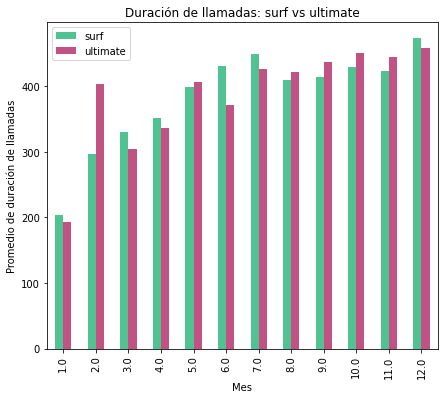

In [29]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
calls_mean_surf = data_plans.query('messages_included == 50').groupby('month')['call_minutes'].mean()
#print(calls_mean_surf)
calls_mean_ultimate = data_plans.query('messages_included == 1000').groupby('month')['call_minutes'].mean()
#print(calls_mean_ultimate)
call_mean = pd.concat([calls_mean_surf, calls_mean_ultimate], axis='columns')
call_mean.columns = range(call_mean.shape[1])
call_mean.rename(columns = {0:'surf', 1:'ultimate'}, inplace = True)
print(call_mean)
call_mean.plot(
    kind = 'bar',
    title = 'Duración de llamadas: surf vs ultimate',
    xlabel = 'Mes',
    ylabel = 'Promedio de duración de llamadas',
    color = ['#51C291','#C25283'],
    figsize = [7.0,6.0],)

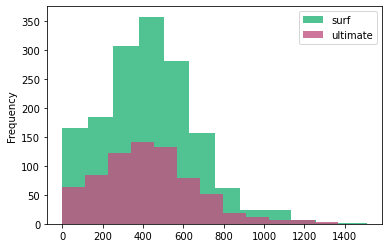

In [30]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
minutes_mean_surf = data_plans[data_plans['messages_included'] ==50]['call_minutes']
#print(minutes_mean_surf)
minutes_mean_ultimate = data_plans[data_plans['messages_included'] == 1000]['call_minutes']
#print(minutes_mean_ultimate)
minutes_mean_surf.plot(kind = 'hist', bins = 12, color = '#51C291')
minutes_mean_ultimate.plot(kind = 'hist',bins = 12, alpha = 0.8, color = '#C25283')
plt.legend(['surf', 'ultimate'])
plt.show()

In [31]:
# Calcula la media y la varianza de la duración mensual de llamadas.
mean_minutes = data_plans['call_minutes'].mean()
print('promedio de duración de llamadas:',mean_minutes)
var_minutes = data_plans['call_minutes'].var()
print('varianza:', var_minutes)


promedio de duración de llamadas: 429.2834714348016
varianza: 55847.17877118995


<AxesSubplot:>

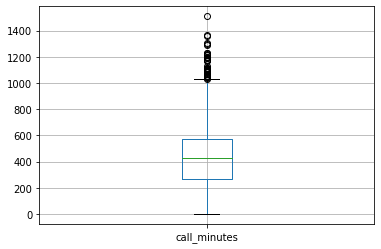

In [32]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
data_plans.boxplot(column = 'call_minutes')

1.-Podemos ver que hubo una diferencia en cuanto a la duración promedio de llamada el mes de febrero, en el cual los usuarios con el plan ultimate tuvieron una duración de llamada de hasta 100min más que los usuarios del plan surf.

2.-Aparentemente aparentemente la distribución de ambos planes son muy parecidas entre sí, la distribución de surf tiene una desviación estándard más pequeña que la de ultimate. (Esto lo compruebo en el siguiente prompt)  

3.-Una duración de llamadas mensuales arriba de 1000 minutos es atípica, por lo que se debería considerar si se ajusta un plan con un límite de duración de llamadas de 1000 minutos mensuales. 

In [33]:
print(data_plans.groupby('plan')['call_minutes'].describe())

           count        mean         std  min    25%    50%     75%     max
plan                                                                       
surf      1573.0  428.749523  234.453150  0.0  272.0  425.0  576.00  1510.0
ultimate   720.0  430.450000  240.508762  0.0  260.0  424.0  565.25  1369.0


### Mensajes

            surf   ultimate
month                      
1.0    10.500000  15.500000
2.0    12.000000  21.571429
3.0    15.260870  20.250000
4.0    17.400000  22.047619
5.0    24.012987  32.103448
6.0    25.298969  29.340426
7.0    27.033058  32.830508
8.0    28.777778  38.478873
9.0    30.762887  37.895349
10.0   33.839662  39.443396
11.0   32.385159  38.606299
12.0   38.600629  45.006623


<AxesSubplot:title={'center':'Mensajes enviados: surf vs ultimate'}, xlabel='Mes', ylabel='Promedio de mensajes'>

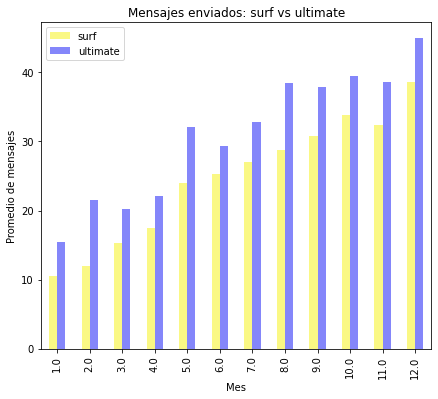

In [34]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
messages_mean_surf = data_plans.query('messages_included == 50').groupby('month')['messages'].mean()
#print(calls_mean_surf)
messages_mean_ultimate = data_plans.query('messages_included == 1000').groupby('month')['messages'].mean()
#print(calls_mean_ultimate)
messages_mean = pd.concat([messages_mean_surf, messages_mean_ultimate], axis='columns')
messages_mean.columns = range(messages_mean.shape[1])
messages_mean.rename(columns = {0:'surf', 1:'ultimate'}, inplace = True)
print(messages_mean)
messages_mean.plot(
    kind = 'bar',
    title = 'Mensajes enviados: surf vs ultimate',
    xlabel = 'Mes',
    ylabel = 'Promedio de mensajes',
    color = ['#FAF884','#8486FA'],
    figsize = [7.0,6.0],)


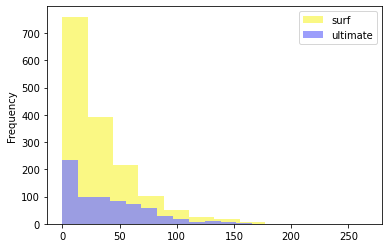

In [35]:
#histogramas de mensajes por plan
messages_surf = data_plans[data_plans['messages_included'] ==50]['messages']
#print(minutes_mean_surf)
messages_ultimate = data_plans[data_plans['messages_included'] == 1000]['messages']
#print(minutes_mean_ultimate)
messages_surf.plot(kind = 'hist', bins = 12, color = '#FAF884' )
messages_ultimate.plot(kind = 'hist',bins = 12, alpha = 0.8, color = '#8486FA')
plt.legend(['surf', 'ultimate'])
plt.show()

In [36]:
# media y desv.est para mensajes
print(data_plans.groupby('plan')['messages'].describe())

           count       mean        std  min  25%   50%   75%    max
plan                                                               
surf      1573.0  31.159568  33.566717  0.0  3.0  24.0  47.0  266.0
ultimate   720.0  37.551389  34.767179  0.0  7.0  30.0  61.0  166.0


<AxesSubplot:>

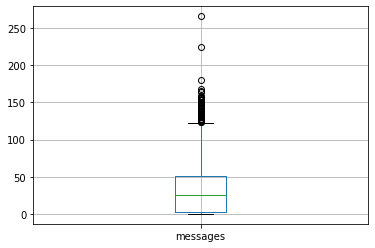

In [37]:
# diagrama de caja para mensajes
data_plans.boxplot(column = 'messages')

1.-Aparentemente los usuarios del plan ultimate envíaron más mensajes al mes, con una tendencia a aumentar el número de mensajes enviados mes con mes en ambos planes

2.-Ambos planes tienen una distribución sesgada a la derecha. El promedio de mensajes envíados de los usuarios con plan ultimate es ~6 mensajes más que el promedio de surf. La desviación estándard es muy parecida en ambos.

3.- En el diagrama de cajas podemos observar que hay valores atípicos arriba de ~125, por lo que se debería considerar si se ajusta un plan con un límite de mensajes arriba de 100-150

### Internet

            surf   ultimate
month                      
1.0     5.000000   7.250000
2.0    12.222222  17.285714
3.0    13.565217  18.416667
4.0    12.220000  16.333333
5.0    14.116883  16.862069
6.0    15.484536  15.425532
7.0    16.876033  16.491525
8.0    16.882716  17.845070
9.0    16.690722  17.011628
10.0   17.409283  17.716981
11.0   16.431095  17.118110
12.0   18.238994  18.397351


<AxesSubplot:title={'center':'Gigabytes usados: surf vs ultimate'}, xlabel='Mes', ylabel='Promedio de gb'>

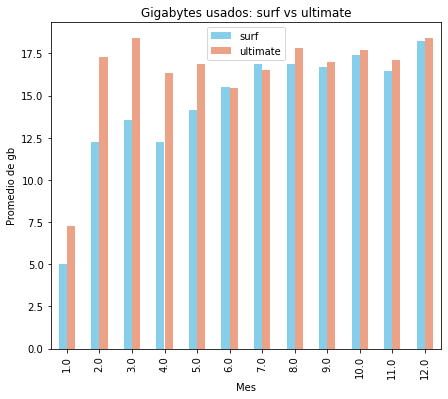

In [38]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
gb_mean_surf = data_plans.query('messages_included == 50').groupby('month')['gb_used'].mean()
#print(calls_mean_surf)
gb_mean_ultimate = data_plans.query('messages_included == 1000').groupby('month')['gb_used'].mean()
#print(calls_mean_ultimate)
gb_mean = pd.concat([gb_mean_surf, gb_mean_ultimate], axis='columns')
gb_mean.columns = range(gb_mean.shape[1])
gb_mean.rename(columns = {0:'surf', 1:'ultimate'}, inplace = True)
print(gb_mean)
gb_mean.plot(
    kind = 'bar',
    title = 'Gigabytes usados: surf vs ultimate',
    xlabel = 'Mes',
    ylabel = 'Promedio de gb',
    color = ['#87CEEB','#EBA286'],
    figsize = [7.0,6.0],)

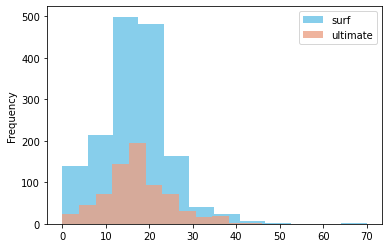

In [39]:
#histogramas de internet por plan
gb_surf = data_plans[data_plans['messages_included'] ==50]['gb_used']
#print(minutes_mean_surf)
gb_ultimate = data_plans[data_plans['messages_included'] == 1000]['gb_used']
#print(minutes_mean_ultimate)
gb_surf.plot(kind = 'hist', bins = 12, color = '#87CEEB' )
gb_ultimate.plot(kind = 'hist',bins = 12, alpha = 0.8, color = '#EBA286')
plt.legend(['surf', 'ultimate'])
plt.show()

In [40]:
# media y desv.est para mensajes
print(data_plans.groupby('plan')['gb_used'].describe())

           count       mean       std  min   25%   50%   75%   max
plan                                                              
surf      1573.0  16.670693  7.847522  0.0  12.0  17.0  21.0  70.0
ultimate   720.0  17.306944  7.670108  0.0  13.0  17.0  21.0  46.0


<AxesSubplot:>

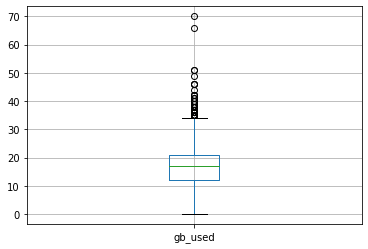

In [41]:
# diagrama de caja para mensajes
data_plans.boxplot(column = 'gb_used')

1.-Aparentemente los usuarios con el plan ultimate utilizaron más gb en los meses de febrero y marzo, en comparación con los del plan surf

2.-La distribución de ambos planes es muy parecida, el promedio de los gb usados tambipen es parecido entre ambos planes, y la desviación estándard es ligeramente mayor en surf ya que uno de los usuarios consumió muchos más gb que el resto (70gb).

3.-En el boxplot podemos observar que hay datos atípicos arriba de ~20, el plan ultimate considera como límite 30gb 

## Ingreso

            surf   ultimate
month                      
1.0    20.000000  70.000000
2.0    34.396667  70.000000
3.0    45.941304  74.666667
4.0    40.710600  73.000000
5.0    47.628182  70.724138
6.0    49.276289  71.638298
7.0    62.674050  71.898305
8.0    63.931173  72.859155
9.0    58.271495  72.034884
10.0   65.421224  72.311321
11.0   58.004276  71.708661
12.0   70.557044  73.291391


<AxesSubplot:title={'center':'Ingreso: surf vs ultimate'}, xlabel='Mes', ylabel='Promedio de ingreso'>

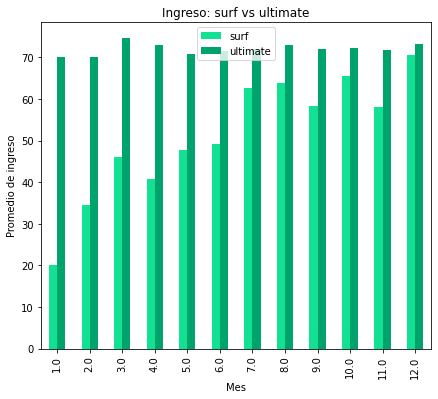

In [42]:
# Compara el ingreso de los planes
pay_mean_surf = data_plans.query('messages_included == 50').groupby('month')['total_pay'].mean()
#print(calls_mean_surf)
pay_mean_ultimate = data_plans.query('messages_included == 1000').groupby('month')['total_pay'].mean()
#print(calls_mean_ultimate)
pay_mean = pd.concat([pay_mean_surf, pay_mean_ultimate], axis='columns')
pay_mean.columns = range(pay_mean.shape[1])
pay_mean.rename(columns = {0:'surf', 1:'ultimate'}, inplace = True)
print(pay_mean)
pay_mean.plot(
    kind = 'bar',
    title = 'Ingreso: surf vs ultimate',
    xlabel = 'Mes',
    ylabel = 'Promedio de ingreso',
    color = ['#12E193','#00A36C'],
    figsize = [7.0,6.0],)

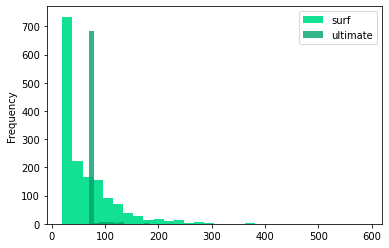

In [43]:
#histogramas de ingresos por plan
pay_surf = data_plans[data_plans['messages_included'] ==50]['total_pay']
#print(minutes_mean_surf)
pay_ultimate = data_plans[data_plans['messages_included'] == 1000]['total_pay']
#print(minutes_mean_ultimate)
pay_surf.plot(kind = 'hist', bins = 30, color = '#12E193' )
pay_ultimate.plot(kind = 'hist',bins = 12, alpha = 0.8, color = '#00A36C')
plt.legend(['surf', 'ultimate'])
plt.show()

In [44]:
# media y desviación estándard  para ingresos
print(data_plans.groupby('plan')['total_pay'].describe())

           count       mean        std   min   25%    50%    75%     max
plan                                                                    
surf      1573.0  60.706408  55.388042  20.0  20.0  40.36  80.36  590.37
ultimate   720.0  72.313889  11.395108  70.0  70.0  70.00  70.00  182.00


<AxesSubplot:>

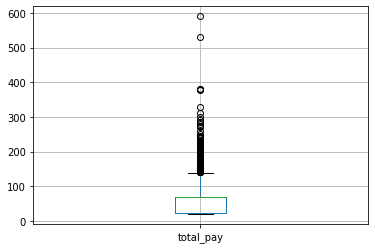

In [45]:
# diagrama de caja para ingreso
data_plans.boxplot(column = 'total_pay')

1.-Los del plan ultimate tienen un ingreso constante, mientras que los del plan surf van aumentando el ingreso mes con mes.

2.-Ambos planes tienen una distrubución parecida (con sesgo a la derecha), sin embargo, la desviación estándard es mucho mayor en el plan surf ya que los valores van de 20 a 590, y en el plan ultimate van de 70 a 182 US. El promedio de los del plan surf es 60.7 US, 3 veces más que el costo de la tarifa base (20 US). Inclusive, el 25% de los usuarios con plan surf, pagan 10 US más que la tarifa base para el plan Ultimate. 

3.-Hay muchos valores atípicos arriba de ~150, ¿Cuál es ese porcentaje?

## Prueba las hipótesis estadísticas

H0 = Los ingresos promedio de los usuarios con plan Ultimate y Surf son iguales

H1 = Los ingresos promedio de los usuarios  con plan Ultimate son diferentes a los que tienen plan Surf

Escogeremos la prueba del valor p con una distribución Z 

In [46]:
# Prueba las hipótesis
alpha = 0.05
results_pay_plan = st.ttest_ind(pay_surf, pay_ultimate, equal_var = False)
print('valor p: ', results_pay_plan.pvalue)

if results_pay_plan.pvalue < alpha:
    print('Se rechaza la hipótesis nula')
else:
    print('No se puede rechazar la hipótesis nula')

valor p:  3.17039054811355e-15
Se rechaza la hipótesis nula


El promedio de los ingresos procedentes de los usuarios de los planes de llamada Ultimate y Surf son diferentes. 

In [47]:
#Hacer Dataframe con la data que necesito
df_total_pay = data_plans[['user_id', 'total_pay']]
df_users_city = df_users[['user_id', 'city']]
df_users_city = df_users_city.merge(df_total_pay, on = 'user_id')
display(df_users_city)

,user_id,city,total_pay
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",70.00
1,1001,"Seattle-Tacoma-Bellevue, WA MSA",20.00
2,1001,"Seattle-Tacoma-Bellevue, WA MSA",20.00
3,1001,"Seattle-Tacoma-Bellevue, WA MSA",90.09
4,1001,"Seattle-Tacoma-Bellevue, WA MSA",60.00
...,...,...,...
2288,1498,"New York-Newark-Jersey City, NY-NJ-PA MSA",100.00
2289,1499,"Orlando-Kissimmee-Sanford, FL MSA",20.00
2290,1499,"Orlando-Kissimmee-Sanford, FL MSA",70.00
2291,1499,"Orlando-Kissimmee-Sanford, FL MSA",40.00


In [48]:
#filtrar la data para obtener los grupos
ny_nj = df_users_city[df_users_city['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']['total_pay']
#display(ny_nj)
print('promedio de ingreso de NY-NJ:',ny_nj.mean())
city_others = df_users_city[df_users_city['city']!='New York-Newark-Jersey City, NY-NJ-PA MSA']['total_pay']
#display(city_others)
print('promedio de ingreso de otras regiones:',city_others.mean())

promedio de ingreso de NY-NJ: 59.921352785145885
promedio de ingreso de otras regiones: 65.2227713987474


H0 = El ingreso promedio de los usuarios de NY-NJ es igual que el de usuarios de otras regiones

H1 = El ingreso promedio de los usuarios de NY-NJ es diferente al de usuarios de otras regiones

In [49]:
# Prueba las hipótesis
alpha = 0.05
results_city = st.ttest_ind(ny_nj, city_others, equal_var = True)
print('valor p: ', results_city.pvalue)

if results_city.pvalue < alpha:
    print('Se rechaza la hipótesis nula')
else:
    print('No se puede rechazar la hipótesis nula')

valor p:  0.043557431621342436
Se rechaza la hipótesis nula


El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones

## Conclusión general

1.-La mayoría de los usuarios son del plan surf (1573) vs utimate(720), es decir 2/3 partes de los usuarios contrataron el plan surf.

2.-En cuanto a duración de llamadas no hay mucha diferencia en el promedio de los usuarios surf(429) vs ultimate (430). Los límites son 500 y 3000 respectivamente. En este caso, el 25% de los usuarios con plan surf están pagando tarifas extra por exceder el límite de minutos en llamadas.   

3.-En cuanto al promedio de mensajes enviados en el plan surf (31) vs ultimate (37) tampoco hay mucha diferencia. Los límites de mensajes son 50 y 100 respectivamente. En este caso a la mayoría de los usuarios les convendría tener el plan surf

4.- En cuanto a internet, surf tuvo un promedio de 16.7gb, esto quizás debido a usuarios atípicos (70gb), y el promedio para ultimate fue 17.3gb. Los límites de gb usados de cada plan son 15 y 30gb respectivamente. En este caso aproximadamente el 75% de los usuarios con el plan surf están pagando tarifas extras. 

5.-En cuanto a ingresos por plan tenemos un promedio en dólares de 60.7 de surf y 72.3 para ultimate, sin embargo, tenemos valores atípicos hacia la derecha, en el caso de surf tenemos un máximo de 590 vs ultimate = 182. En este caso, aproximadamente el 25% de los usuarios con plan surf están pagando ~10 USD más que los usuarios con plan ultimate

La mejor estrategia para determinar si conviene o no adquirir cierto plan es observando la cantidad de gb que requiere el cliente. Debido a que la mayoría de los clientes utilizan arriba de 15gb, que es lo que ofrece el plan surf, habría que intentar convencer a los clientes de adquirir el plan ultimate. 

<div class="alert alert-block alert-success">
    
# Comentarios genrales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo, Laura. Todo ha sido corregido y has aprobado un nuevo proyecto. ¡Felicitaciones!
</div>